In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
"""
[주성분분석]
- 3차원을 2차원으로
- 특성이 많으면 훈련모델의 성능은 높아지지만, 과대적합 발생가능
[주성분분석 방법]
- 데이터를 가장 잘 나타내는 일부 특성 선택
- 데이터 크기를 줄이면서, 학습 모델의 성능을 향상하는 방법
[장점]
- 대량의 데이터를 이용하여 훈련 시 PCA 방법을 이용하면 훈련시간을 줄일 수 있음

"""

# *.npy : 넘파이 배열의 기본 저장 포맷 / 읽어들일떄는 넘파이 load() 사용
# 데이터의 성격 : 3가지 과일에 대한 이미지 데이터
# 사과, 바나나, 파인애플에 대한 이미지 데이터
file_path = "./data/09_fruits_300.npy"
fruits = np.load(file_path)
print(fruits.shape)

fruits_2d = fruits.reshape(-1,100*100)
print(fruits_2d.shape)
# """
# 3차원 데이터 : (300, 100, 100)
# - 첫번째 값 : 행의 개수 300개
# - 두번째 값 : 열의 개수 100개
# - 세번째 값 : 픽셀값
# """

(300, 100, 100)
(300, 10000)


In [3]:
# 주성분분석
# 모델생성
# n_components : 축소하고자 하는 주성분의 개수 지정
pca = PCA(n_components=50)
# 훈련시키기
pca.fit(fruits_2d)


PCA(n_components=50)

In [4]:
# 주성분 차원 확인
pca.components_.shape

(50, 10000)

In [5]:
# 시각화하기

# arr : 3차원 데이터
# ratio : 비율
def draw_fruits(arr,ratio=1):
    # 샘플의 개수
    n = len(arr)
    # 그림을 그릴 행의 개수 지정 : 10으로 나누어서 행의 개수 결정
    # 한줄에 10개씩 이미지 그리기 위해
    rows = int(np.ceil(n/10))
    # 행이 1개일 때 : 열 개수는 샘플 개수, 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    # subplot 설정
    # squeeze : 2차원 공간을 행렬의 2차원으로 만들기 위해
    fig, axs = plt.subplots(rows,cols,
                            figsize=(cols*ratio,rows*ratio),
                            squeeze=False)
    for i in range(rows):
        for j in range(cols):
            # n개 까지만 그리기
            if (i * 10 + j) < n:
                axs[i,j].imshow(arr[i*10+j],cmap="gray_r")
            axs[i,j].axis("off")
    plt.show()

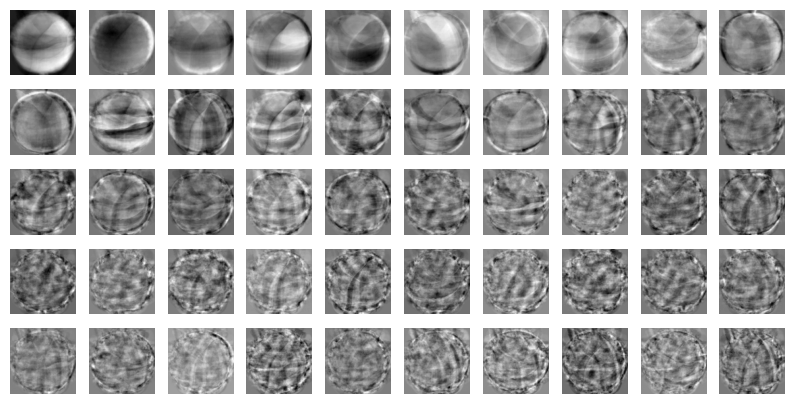

In [6]:
# 주성분으로 훈련한 결과 시각화 하기
draw_fruits(pca.components_.reshape(-1,100,100))

In [7]:
# PCA를 이용한 주성분 차원축소(특성 개수 줄이기)
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [8]:
# 원본데이터를 주성분으로 재구성하기 : 이미지 다시 복원(주성분으로만)
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

In [9]:
# 3차원 데이터로 변환하기 : 그림그리기 위해
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
fruits_reconstruct.shape

(300, 100, 100)

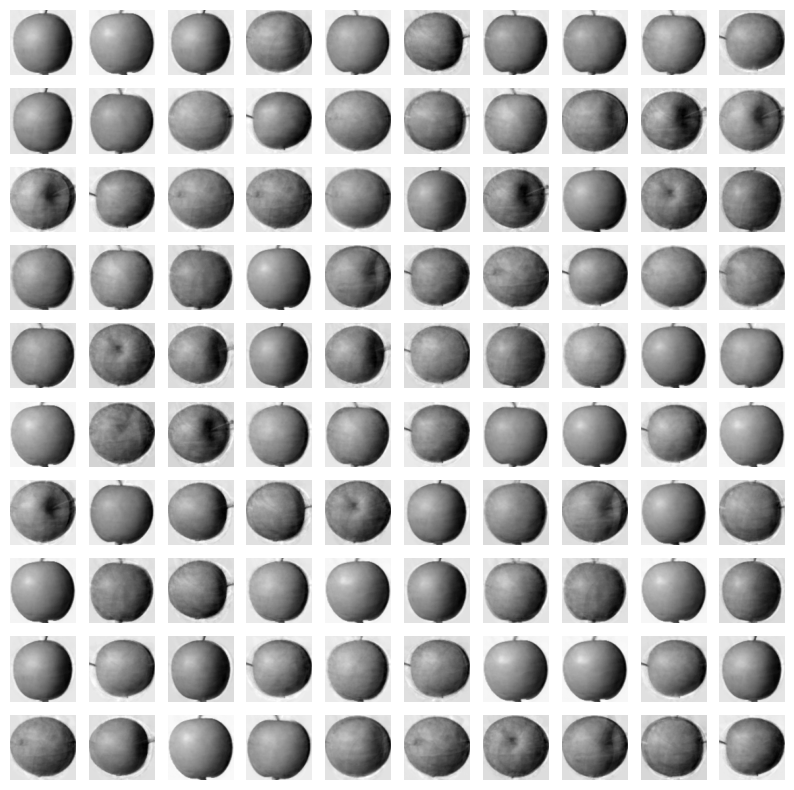

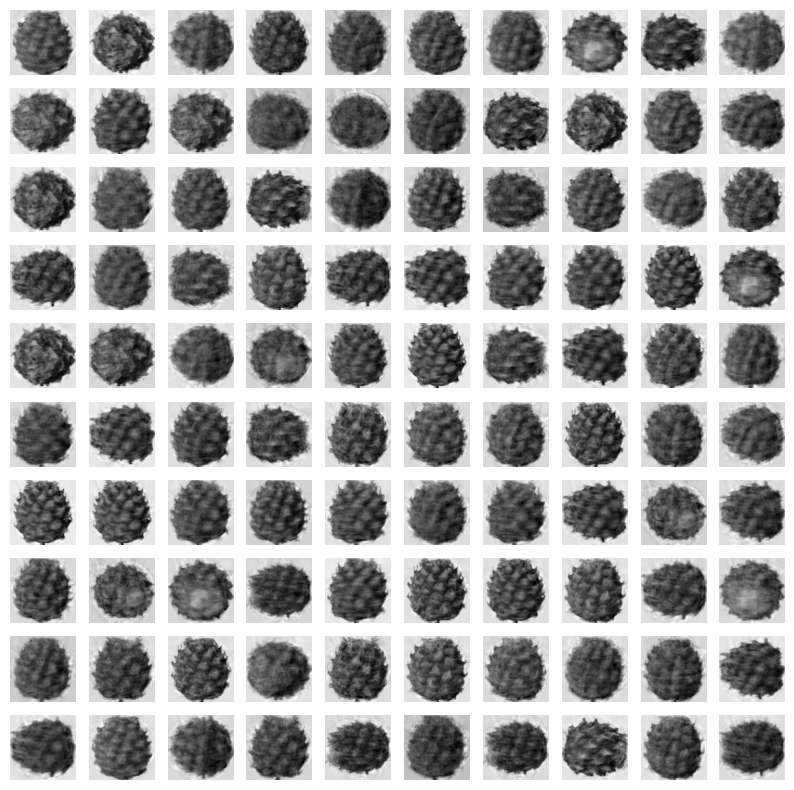

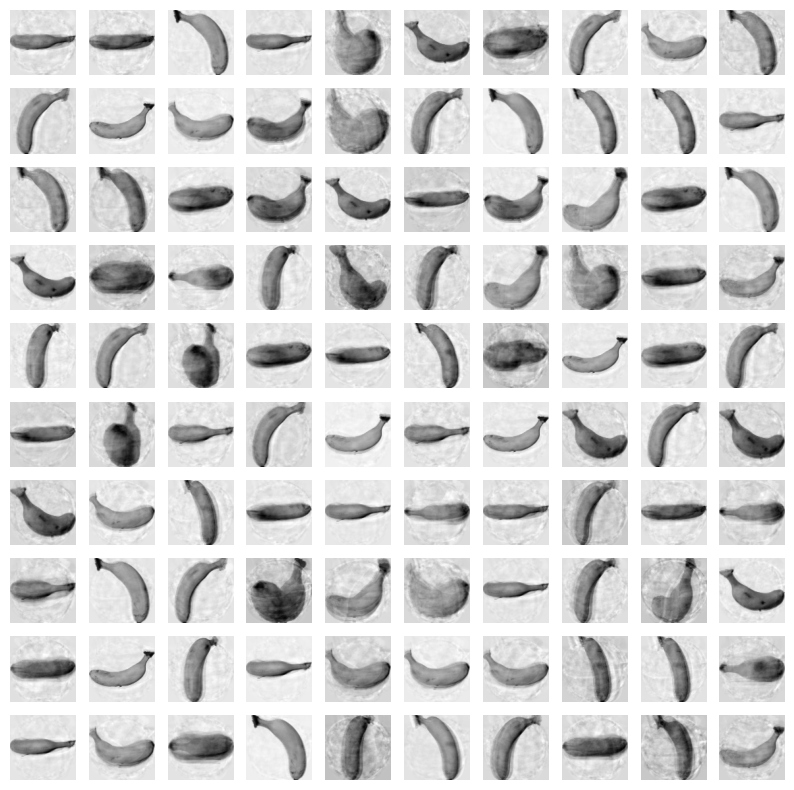

In [10]:
# 시각화 하기
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

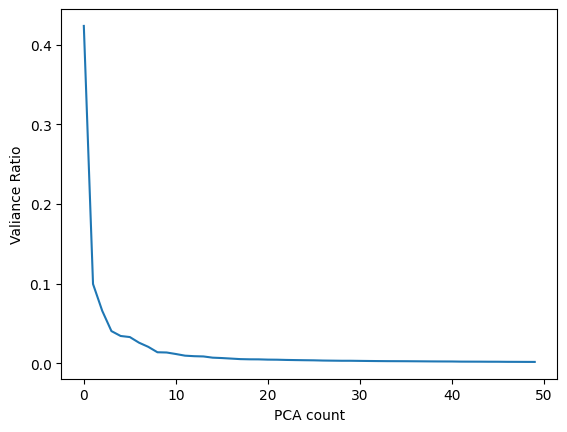

In [11]:
# 주성분의 개수 확인
plt.plot(pca.explained_variance_ratio_)
# y값은 분산값
plt.xlabel("PCA count")
plt.ylabel("Valiance Ratio")
plt.show()


In [ ]:
# KMeans 적용
# 다른모델에 적용

In [12]:
# 로지스틱 회귀모델에 적용

from sklearn.linear_model import LogisticRegression

# 모델 생성
lr = LogisticRegression()
lr

LogisticRegression()

In [14]:
# 로지스틱회귀 모델은 정형데이터를 사용하는 지도학습 모델
# -종속변수(target)가 필요
# - 사용하는 데이터는 3개의 그룹(0,1,2)의 그룹으로 나눠져 있고 이 그룹 값이 종속변수 값이 된다
# - 각 그룹은 100개씩 / 변수명 target으로 하는 종속변수를 만들어라
target = np.array([0]*100 + [1]*100 + [2]*100)
target.shape

(300,)

In [15]:
# 현재 fruits 데이터 형태 보기
df = pd.DataFrame(fruits_2d)
df["target"] = target
df

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,target
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,1,1,1,1,1,1,1,3,...,1,1,1,1,1,1,1,1,1,2
296,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
297,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
298,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2


In [20]:
# 교차검증으로 로지스틱회귀 모델 정확도 확인
from sklearn.model_selection import cross_validate
# 주성분분석(PCA)을 하지않은 fruits_2d 데이터 사용
scores = cross_validate(lr,fruits_2d,target)
print(round(np.mean(scores["test_score"]),3))
print(round(np.mean(scores["fit_time"]),3))
print(round(np.mean(scores["score_time"]),3))

0.997
0.224
0.001


In [21]:
# 주성분분석(PCA)을 한데이터 사용
scores = cross_validate(lr,fruits_pca,target)
print(round(np.mean(scores["test_score"]),3))
print(round(np.mean(scores["fit_time"]),3))
print(round(np.mean(scores["score_time"]),3))

1.0
0.007
0.0


In [27]:
# KMeans(K-평균)에 적용
# - 클러스터 개수 어제 결정된 값 사용
# - 모델 변수 km
# - 훈련시 사용데이터 : pca 데이터

# 라이브러리 임포트
from sklearn.cluster import KMeans
# 모델 생성
km = KMeans(n_clusters=3, random_state=42)
# 훈련
km.fit(fruits_pca)


C:\Users\Administrator\anaconda3\envs\pknu_base\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [28]:
# 그룹을 몇개로 했는지 확인
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


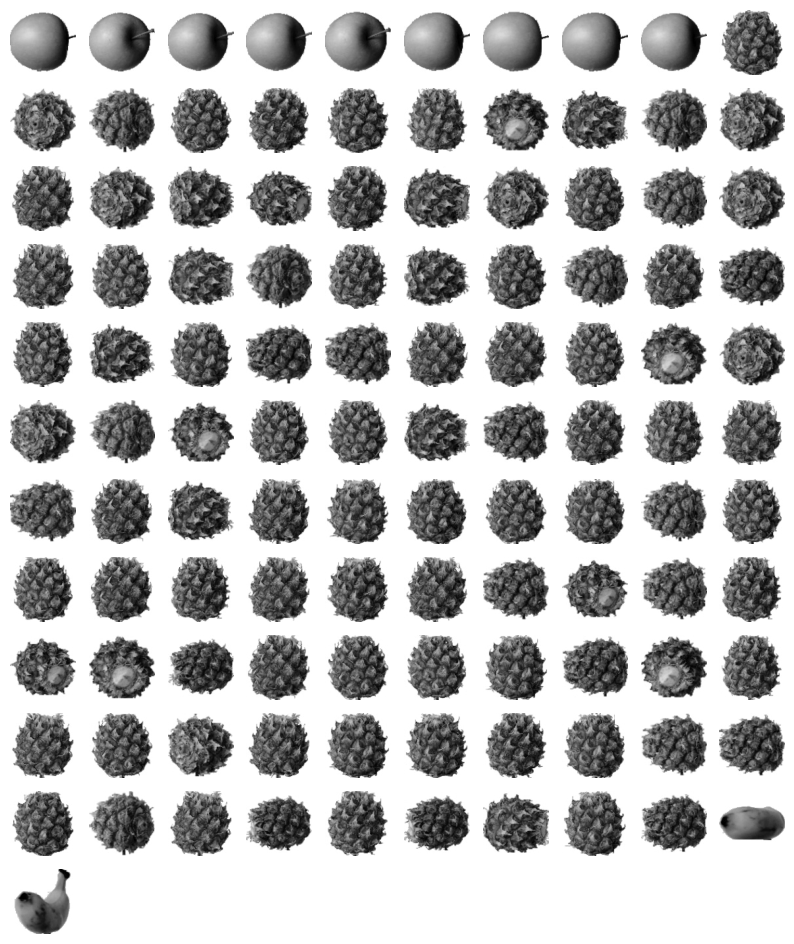

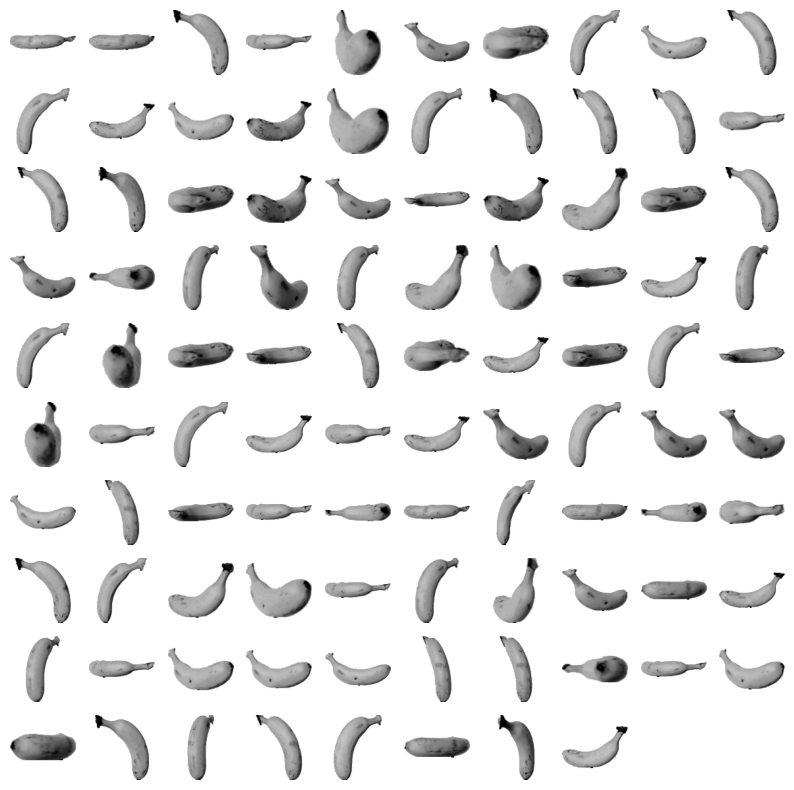

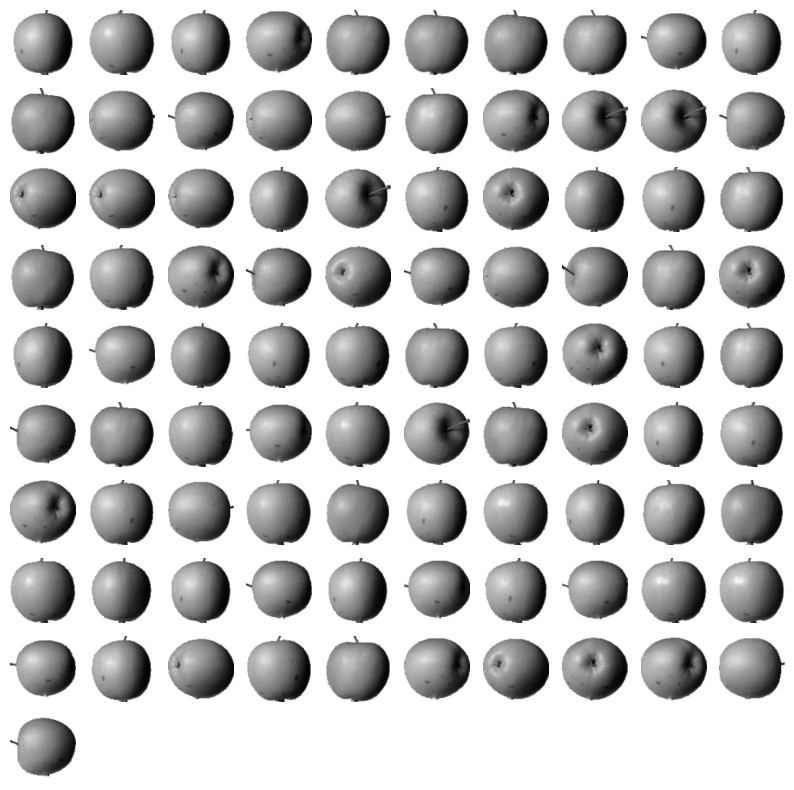

In [30]:
# 시각화
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

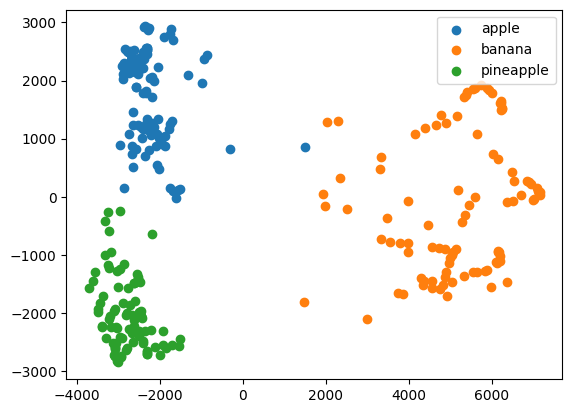

In [31]:
# 산점도로 시각화해 3개 그룹의 분포 확인
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0],data[:,1])
plt.legend(["apple","banana","pineapple"])
plt.show()